In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
col_names = ['day', 'KY_CD', 'cnt']
df = pd.read_csv('day_valid.csv', header=None, names=col_names, dtype=int)
# df.head(6)

In [3]:
ttl = df.groupby(df.day).sum().cnt.values
day = range(1, 8)
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pool = [341, 578, 344, 109, 351, 106]
pool_desc = ['Petit Larceny', 'Harrassment 2', 'Assault 3', 'Criminal Mischief', 'Grand Larceny', 'Dangerous Drugs']
df_top6 = df[df.KY_CD.isin(pool)]

lst = []
for i in pool:
    lst.append(df_top6[df_top6.KY_CD==i].cnt.values)
# lst

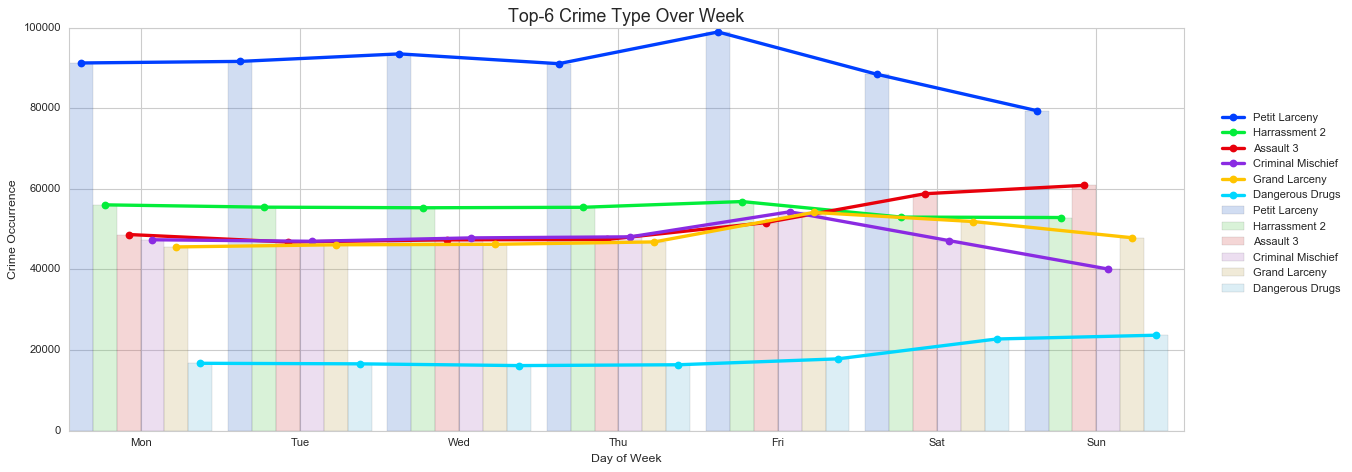

In [9]:
# bar plot
plt.figure(figsize=(15, 6))
# c = sns.cubehelix_palette(6, dark=0.3, light=0.9, reverse=True)
c = sns.color_palette("muted", 6)
c2 = sns.color_palette("bright", 6)

N = len(day)
ind = np.arange(N)
w = 0.15

for i in range(6):
    plt.bar(ind+w*i, lst[i], w, color=c[i], label=pool_desc[i], alpha=0.25)
for i in range(6):
    plt.plot(ind+w*(i+.5), lst[i], "o-", color=c2[i], label=pool_desc[i], linewidth=3)

plt.xlabel('Day of Week')
plt.ylabel('Crime Occurrence')
plt.title('Top-6 Crime Type Over Week', fontsize=16)
plt.xticks(ind+3*w, day_name)
plt.legend(bbox_to_anchor=(1.03, 0.8), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

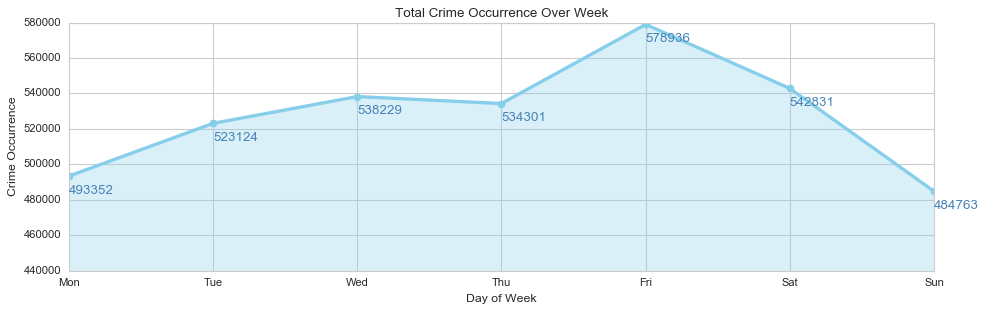

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(day, ttl, "o-", linewidth=3, fillstyle='full', color='skyblue')
plt.xticks(day, day_name)
plt.title('Total Crime Occurrence Over Week')
plt.xlabel('Day of Week')
plt.ylabel('Crime Occurrence')
for i in range(len(ttl)):
    plt.text(day[i], ttl[i]-10000, str(ttl[i]), fontsize=12, color='steelblue')
plt.fill_between(day, ttl, 440000, alpha=0.3, color='skyblue')
plt.tight_layout()
plt.show()

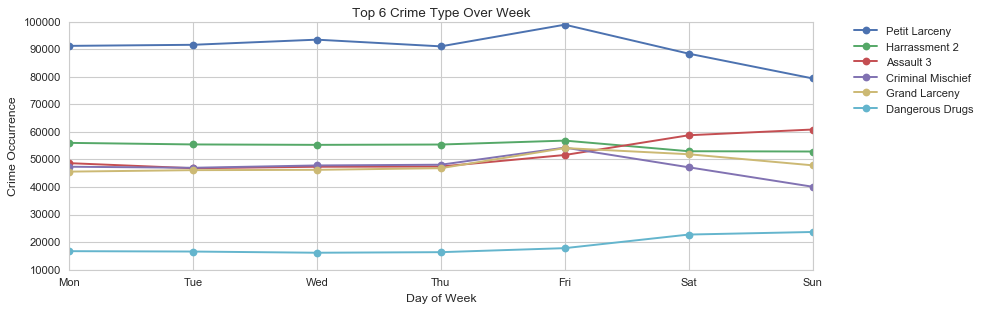

In [11]:
plt.figure(figsize=(12, 4))
for i in range(6):
    plt.plot(day, lst[i], "o-", label=pool_desc[i])

plt.title('Top 6 Crime Type Over Week')
plt.xlim(1)
plt.xticks(day, day_name)
plt.xlabel('Day of Week')
plt.ylabel('Crime Occurrence')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
